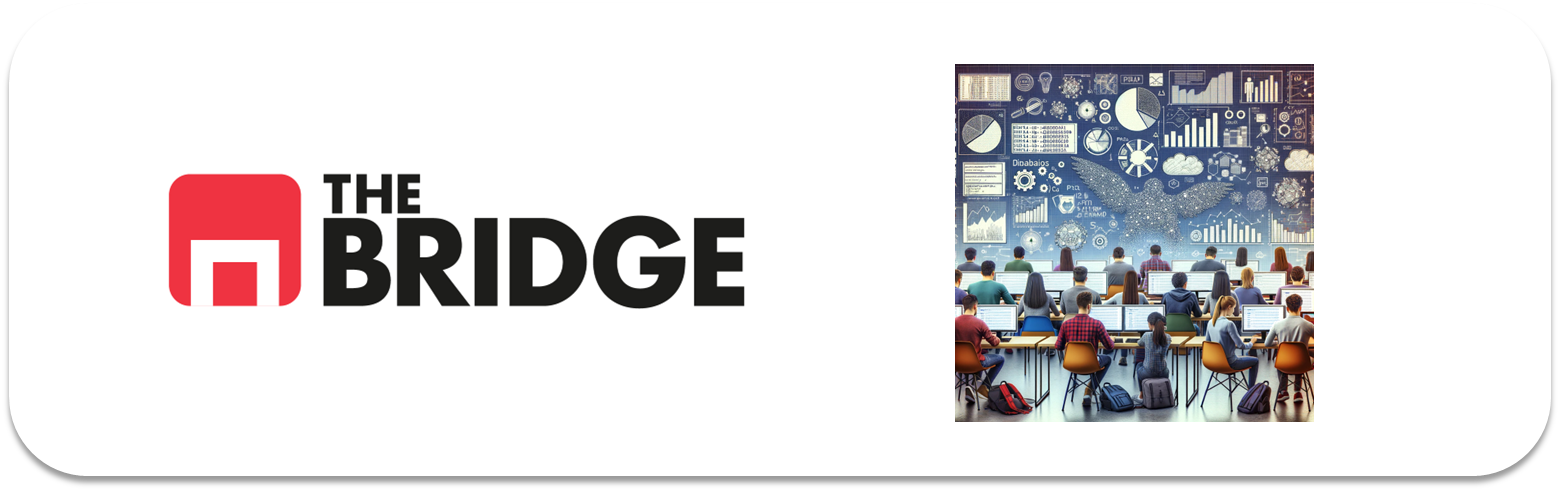

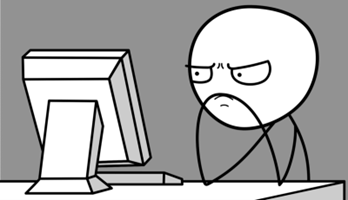

Para ejercitarte y afianzar lo aprendido sobre **Modelado RL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [25]:
import numpy as np
import pandas as pd
from sklearn import metrics # for the check the error and accuracy of the model
import matplotlib.pyplot as plt
import seaborn as sns


El objetivo de los ejercicios es hacer un modelado de regresión lineal sobre el dataset de datos sobre diabetes de `sklearn`. Sigue las instrucciones cuando sea necesario para poder continuar

### Ejercicio 1: Cargar los datos

Primero, cargaremos el conjunto de datos de diabetes. Hazlo en la celda de abajo importando los conjuntos de datos y luego cargando el conjunto de datos en la variable `diabetes` usando la función `load_diabetes()` ([documentación](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)). Muestra los datos invocando la variable (ojo no es un `dataframe`) y luego muestra los valores de sus "claves".


In [7]:
from sklearn.datasets import load_diabetes #importar función para cargar el dataset de diabetes

# Cargar el dataset de diabetes
diabetes = load_diabetes()

# Mostrar todos los datos de forma general. 
print("\nDatos generales del dataset de diabetes:")
print(diabetes)

# Es un array bidimensional de numpy

# Mostrar las claves del dataset
print("Claves del dataset de diabetes:", diabetes.keys())


Datos generales del dataset de diabetes:
{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  7

### Ejercicio 2: Entender los datos


Imprime la descripción en la celda de abajo usando el atributo `DESCR` de la variable `diabetes`. Lee la descripción de los datos cuidadosamente para entender completamente lo que representa cada columna.



In [8]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Basándote en la descripción de los datos, responde a las siguientes preguntas:

1. ¿Cuántos atributos hay en los datos? ¿Qué significan? 10 atrib utos. Son diferentes características fisiológicas de los pacientes con diabetes

2. ¿Cuál es la relación entre `diabetes['data']` y `diabetes['target']`? La columna target es la variable que se quiere predecir a partir de los atributos de data

3. ¿Cuántos registros hay en los datos? 442 instancias


### Ejercicio 3: ETL basica

Crea una `dataframe` pandas que contenga todos los datos, llamalo `X`. Crea una variable `y` que contenga el target. Echa un vistazo y muestra la info general del mismo.

In [17]:
x = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
y = pd.DataFrame(diabetes['target'],columns=['target'])

x.sample(10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
355,-0.074533,0.050680,-0.009439,0.014987,-0.037344,-0.021669,-0.013948,-0.002592,-0.033246,0.011349
367,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033654,0.032059
288,0.070769,0.050680,-0.016984,0.021872,0.043837,0.056305,0.037595,-0.002592,-0.070209,-0.017646
165,-0.041840,-0.044642,-0.066563,-0.046985,-0.037344,-0.043276,0.048640,-0.039493,-0.056153,-0.013504
98,0.001751,0.050680,-0.005128,-0.012556,-0.015328,-0.013840,0.008142,-0.039493,-0.006081,-0.067351
97,-0.027310,-0.044642,0.088642,-0.025191,0.021822,0.042527,-0.032356,0.034309,0.002861,0.077622
398,0.012648,-0.044642,0.015350,-0.033213,0.041086,0.032193,-0.002903,-0.002592,0.045067,-0.067351
36,0.012648,-0.044642,0.022895,0.052858,0.008063,-0.028558,0.037595,-0.039493,0.054720,-0.025930
363,-0.049105,0.050680,-0.024529,0.000079,-0.046975,-0.028245,-0.065491,0.028405,0.019196,0.011349
109,0.038076,0.050680,-0.009439,0.002351,0.001183,0.037517,-0.054446,0.050176,-0.025953,0.106617


In [33]:
x.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [15]:
y.sample(10)

,0
16,166.0
199,90.0
398,242.0
287,219.0
279,200.0
50,155.0
138,336.0
165,59.0
271,127.0
202,196.0


### Ejercicio 4: Train y test

Crea los dataset de train y test, pero no uses el `train_test_split` de `sklearn`. Crea los siguientes datasets: `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test` y `diabetes_target_test`. Usa los últimos 20 registros para los datos de prueba y el resto para los datos de entrenamiento.


In [18]:
diabetes_data_train = x[:-20] # todos los datos menos los últimos 20
diabetes_data_test = x[-20:] # últimos 20 datos

diabetes_target_train = y[:-20] # todos los datos menos los últimos 20
diabetes_target_test = y[-20:]  #últimos 20 datos

In [43]:
diabetes_data_train.shape, diabetes_data_test.shape, diabetes_target_train.shape, diabetes_target_test.shape

((422, 10), (20, 10), (422, 1), (20, 1))

### Ejercicio 5: MiniEDA

Como son todo variables numéricas muestra el coeficiente de correlación de todas las variables con el target. Independientemente del resultado quédate con todas las variables como features, crea una lista feature

In [27]:
corr_matrix = pd.concat([diabetes_data_train,diabetes_target_train], axis=1).corr()
corr_matrix['target'].sort_values(ascending=False)


target    1.000000
bmi       0.578905
s5        0.559668
bp        0.437657
s4        0.433315
s6        0.387471
s1        0.217091
age       0.190093
s2        0.177490
sex       0.036863
s3       -0.393215
Name: target, dtype: float64

<Axes: >

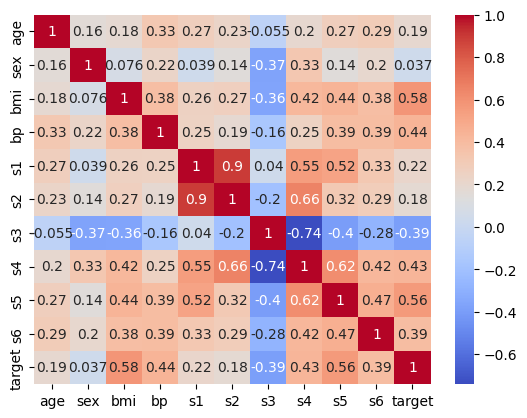

In [29]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [47]:
features = ['age','sex','bmi', 'bp', 's1', 's2', 's3', 's4', 's5','s6']  

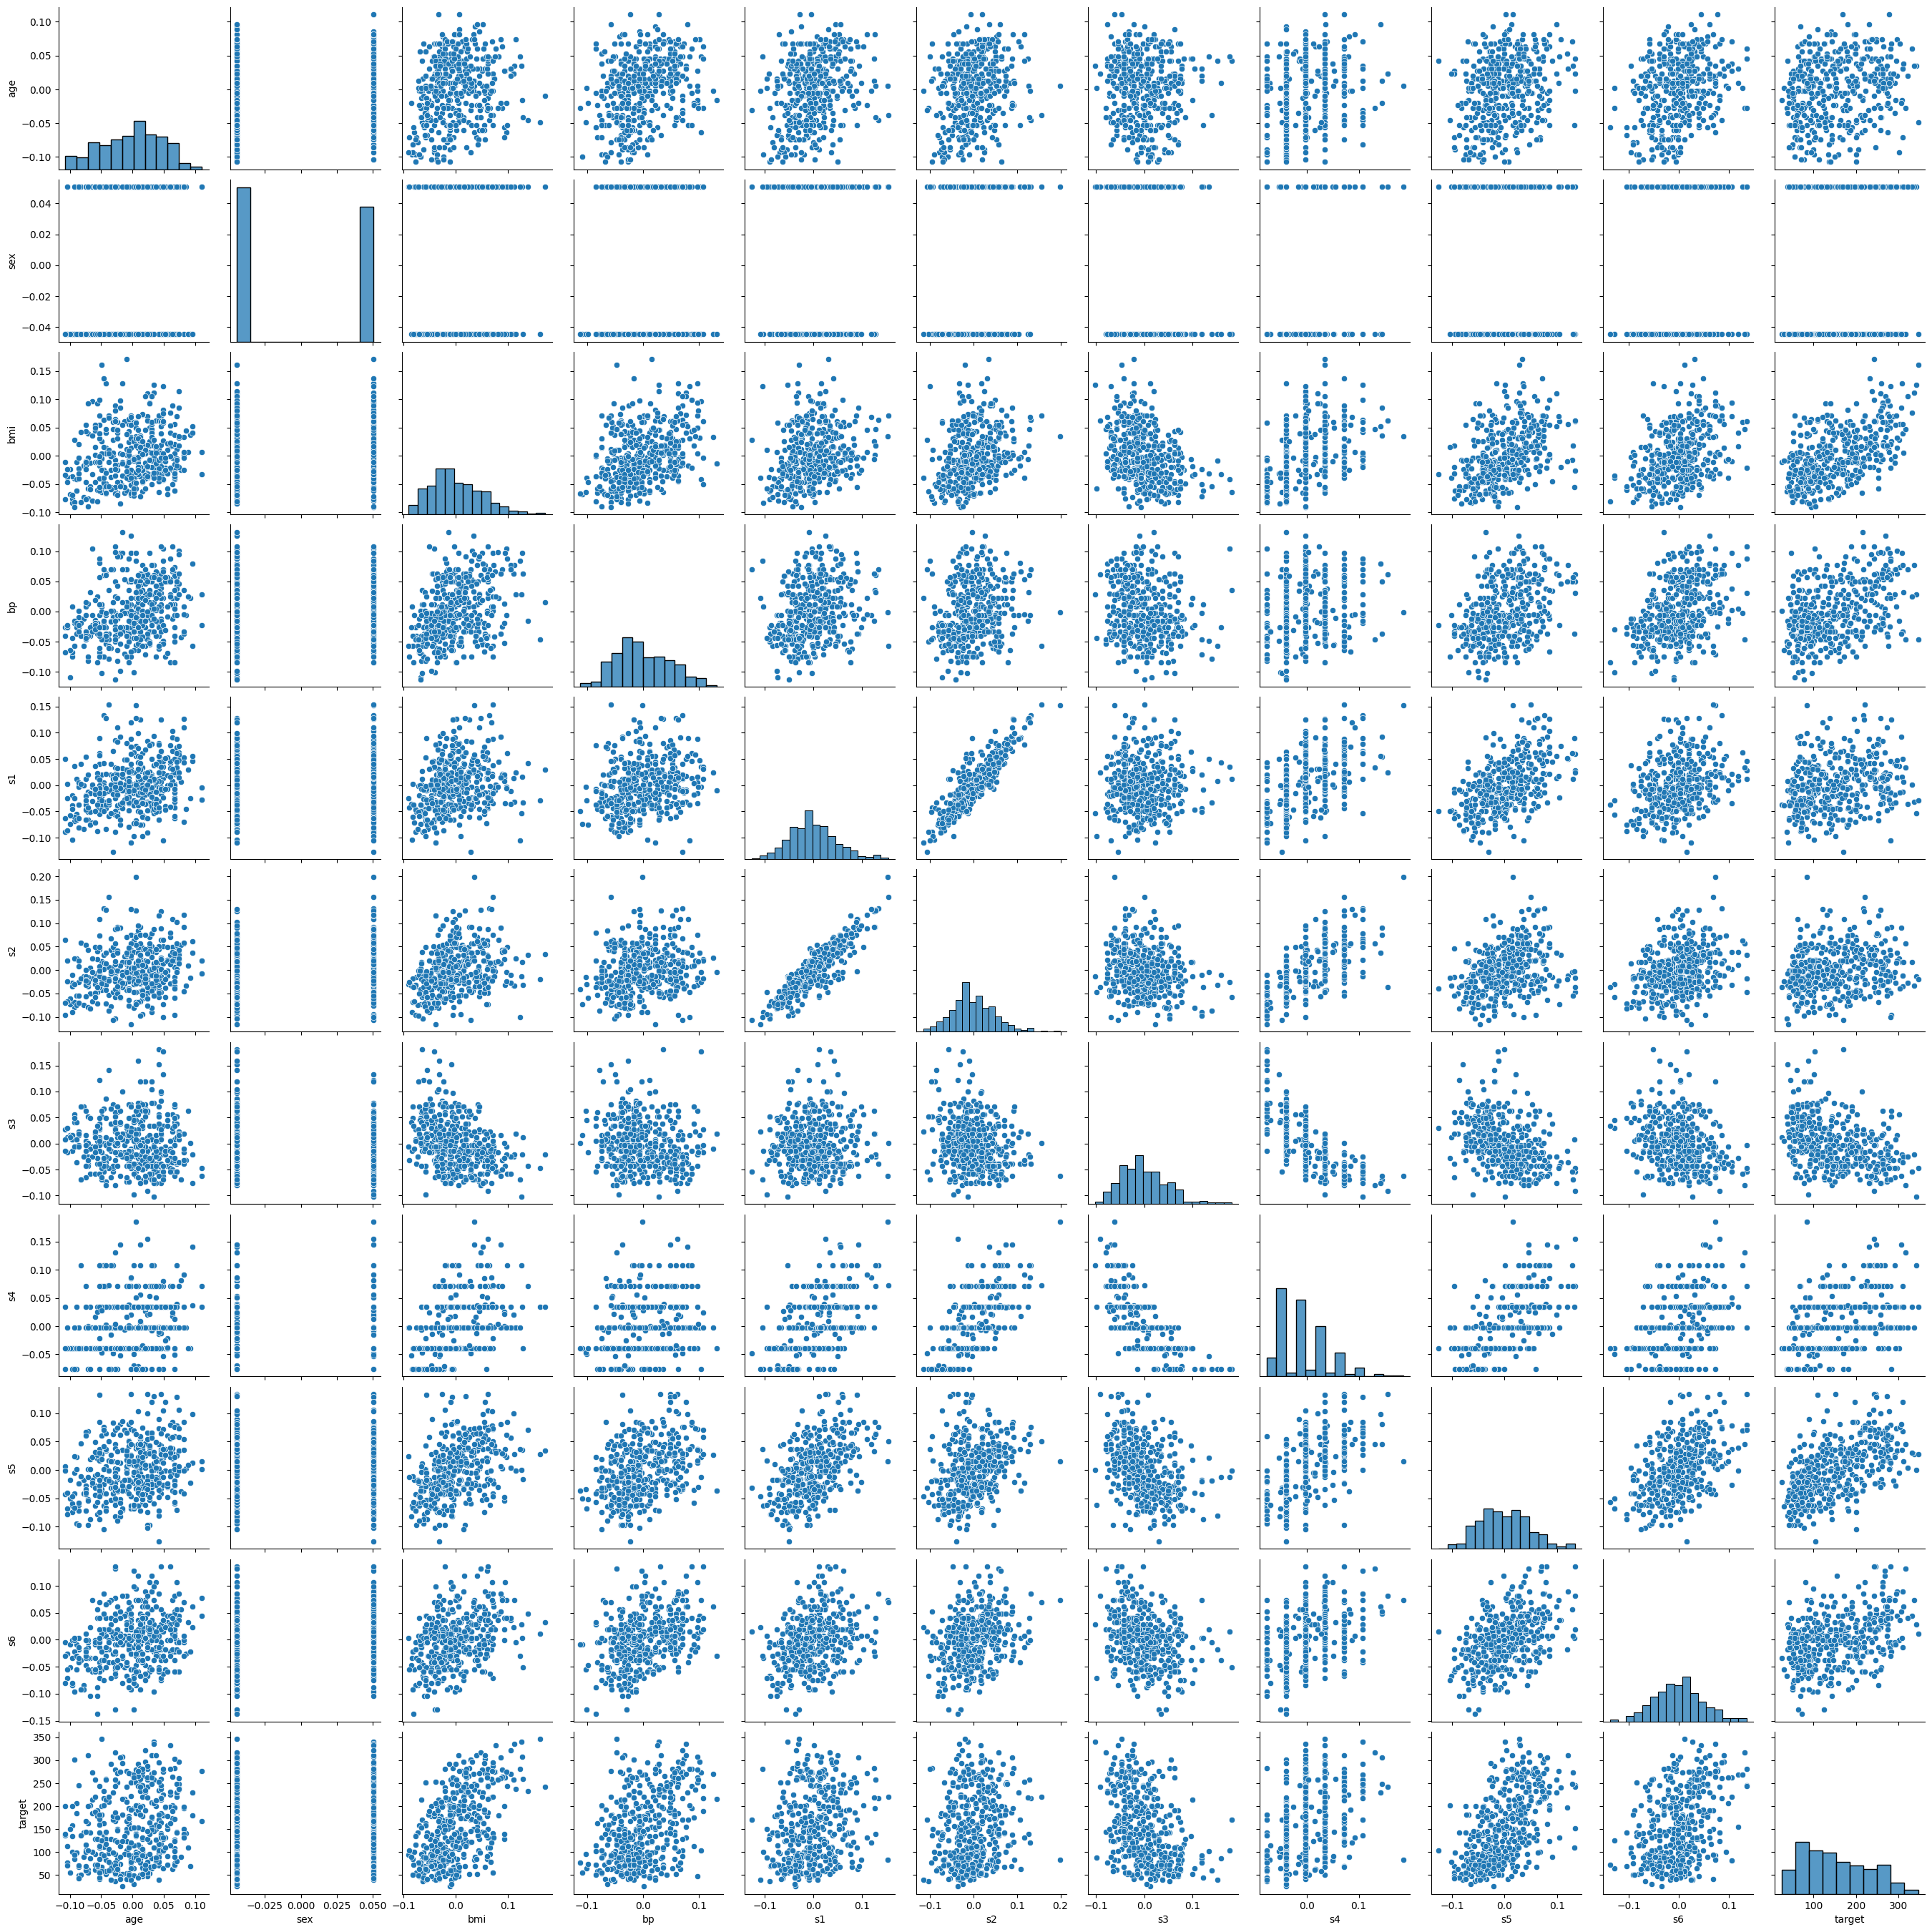

In [36]:
sns.pairplot(pd.concat([diabetes_data_train, diabetes_target_train], axis=1))

### Ejercicio 6: Escogemos e instanciamos modelos

En nuestro caso no vamos a crear una baseline ni a escoger otro modelo más que el regresor lineal. Importa e instancia un modelo de ese tipo de la librería `sklearn`

In [31]:
from sklearn.linear_model import LinearRegression # importar el modelo de regresión lineal

lr = LinearRegression() # Instanciar el modelo

### Ejercicio 7: Selección con cross-validation o entrenamiento

Cómo solo tenemos un modelo no hace falta emplear la cross-validation para comprobar sus prestaciones con otro (esta situación no será la normal en el futuro, pero ahora nos vale), así que pasamos directamente al entrenamiento. Entrena tu modelo:



In [32]:
lr.fit(diabetes_data_train, diabetes_target_train) # Entrenar el modelo

LinearRegression()

Antes de seguir, ¿por qué no hemos escalado o tratado las features numéricas antes de hacer el entrenamiento?

* Tienen unidades y rangos muy similares
* la distribució de las figures no muestra heavy-tails en general


### Ejercicio 8: Visualizando los parámetros


Imprime los coeficientes y el intercepto del modelo. Muéstralos luego como un dataframe.

In [50]:
print(lr.coef_) # Coeficientes de la regresión
print(f"Intercept = {lr.intercept_}") # Término independiente de la regresión

coeficientes = pd.DataFrame(lr.coef_.T, index=features,columns=['Coeficientes'])
coeficientes

[[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
  -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
   7.43509388e+02  7.60966464e+01]]
Intercept = [152.76429169]


,Coeficientes
age,0.306094
sex,-237.635570
bmi,510.538048
bp,327.729878
s1,-814.111926
s2,492.799595
s3,102.841240
s4,184.603496
s5,743.509388
s6,76.096646


### Ejercicio 9: Visualizando la regresión

Escribe la función de regresión, que constituye el corazón del modelo, (aproxima los coeficientes si lo crees conveniente):

# Modelo de Regresión Lineal

El modelo de regresión lineal se define como:

**y = Intercept + Σ(Coefficient_i * Feature_i)**

Donde:

- **Intercepto**: 152.76429169
- **Coeficientes**:

| Variable | Coeficiente   |
|----------|---------------|
| age      | 0.306094      |
| sex      | -237.635570   |
| bmi      | 510.538048    |
| bp       | 327.729878    |
| s1       | -814.111926   |
| s2       | 492.799595    |
| s3       | 102.841240    |
| s4       | 184.603496    |
| s5       | 743.509388    |
| s6       | 76.096646     |

La fórmula del modelo queda entonces:

**y = 152.7643 + 0.306 * age - 237.635 * sex + 510.538 * bmi + 327.729 * bp - 814.112 * s1 + 492.799 * s2 + 102.8412 * s3 + 184.603 * s4 + 743.509 * s5 + 76.0966 * s6**

Este modelo puede ser utilizado para predecir el valor objetivo (`target`) basado en las características del dataset.



### Ejercicio 10: Evaluación (I)

Muestra las predicciones para el dataset de test y muestra la diferencia con los valores reales:

In [67]:
predicciones = pd.DataFrame(lr.predict(diabetes_data_test), columns=["predicciones"]) # Predecir los valores de test

predicciones['real'] = diabetes_target_test.values # Añadir los valores reales
predicciones["diferencia (real-pred)"] = predicciones["real"] - predicciones["predicciones"] # Calcular la diferencia entre los valores reales y las predicciones

predicciones

,predicciones,real,diferencia (real-pred)
0,197.618985,233.0,35.381015
1,155.440320,91.0,-64.440320
2,172.888751,111.0,-61.888751
3,111.532706,152.0,40.467294
4,164.793973,120.0,-44.793973
5,131.067659,67.0,-64.067659
6,259.124412,310.0,50.875588
7,100.478737,94.0,-6.478737
8,117.060054,183.0,65.939946
9,124.302616,66.0,-58.302616


### Ejercicio 11

Importa las métricas de sklearn que necesites y, apoyandote en el método `score` del modelo, muestra el MAE, MSE, RMSE, MAPE y coeficiente de determinación $R^2$) para el modelo y el caso del test

In [71]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(predicciones["real"], predicciones["predicciones"]))
print("MSE:", metrics.mean_squared_error(predicciones["real"], predicciones["predicciones"]))
print("RMSE:", np.sqrt(metrics.mean_squared_error(predicciones["real"], predicciones["predicciones"])))
print("MAPE:", np.mean(np.abs((predicciones["real"] - predicciones["predicciones"]) / predicciones["real"])) * 100)
print("R2:", metrics.r2_score(predicciones["real"], predicciones["predicciones"]))

MAE: 36.60961865545879
MSE: 2004.5186863342096
RMSE: 44.77185149549
MAPE: 39.30876102873052
R2: 0.585085427447195


### EXTRA:

1. Pinta la comparación entre predicciones (eje x) y valores reales (eje y) y añade la diagonal y=x sobre la que deberían caer todos los puntos en un predictor perfecto.

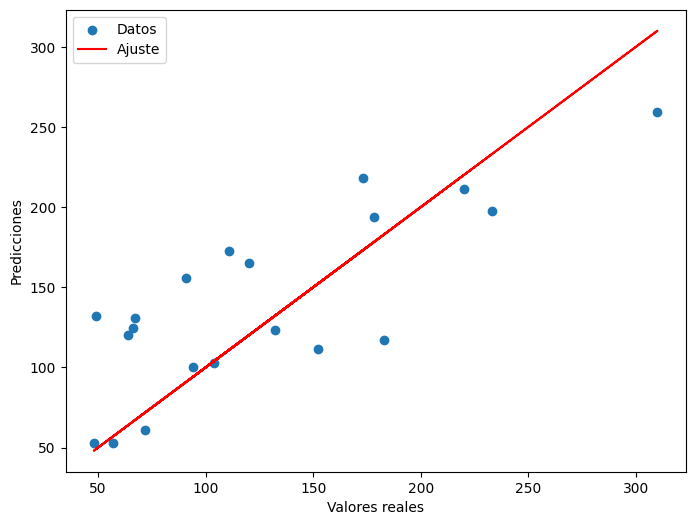

In [90]:
plt.figure(figsize=(8, 6))  # Asegurar un tamaño adecuado de la figura

# Generar el gráfico de dispersión
plt.scatter(diabetes_target_test, predicciones["predicciones"], label="Datos")
plt.plot(diabetes_target_test, diabetes_target_test, label="Ajuste", color="red")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()
plt.show()


2. Muestra la importancia de cada coeficiente de forma gráfica utilizando diagramas de barras horizontales (barh, en pyplot)

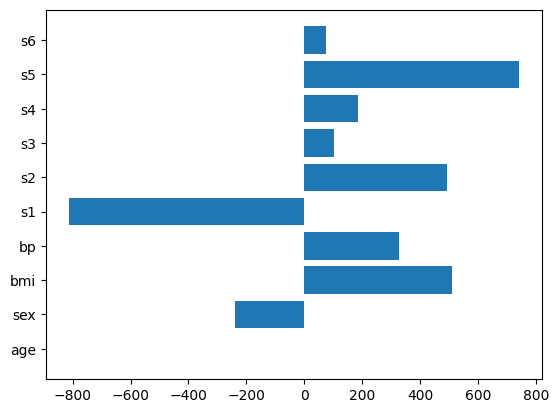

In [91]:
plt.barh(coeficientes.index,coeficientes.Coeficientes)
plt.show()